In [145]:
import cv2
import numpy as np
import os
import json
from matplotlib import pyplot as plt

with open("data/input.json", "r") as f:
    input_data = json.load(f)

image_paths = input_data["image_files"]
image_num = 4


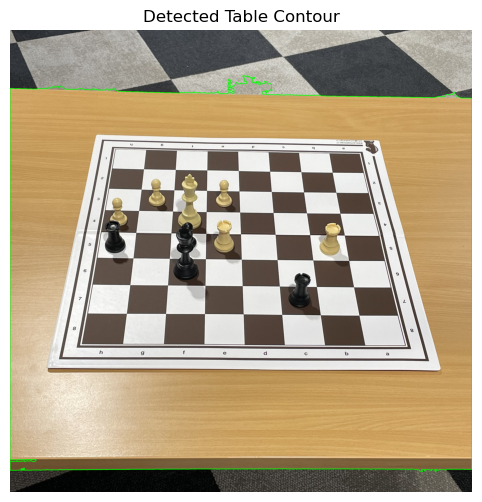

In [146]:
image = cv2.imread(image_paths[image_num])

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_brown = np.array([0, 22, 107])
upper_brown = np.array([30, 255, 255])

mask = cv2.inRange(hsv, lower_brown, upper_brown)

kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

table_contour = max(contours, key=cv2.contourArea)

contour_image = image.copy()
cv2.drawContours(contour_image, [table_contour], -1, (0, 255, 0), 3)

contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.title("Detected Table Contour")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()


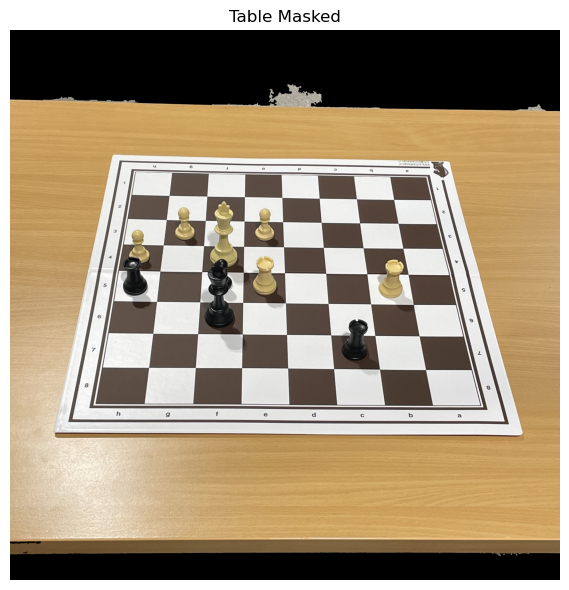

In [147]:
table_mask = np.zeros_like(image)
cv2.drawContours(table_mask, [table_contour], -1, (255, 255, 255), thickness=cv2.FILLED)
masked_image = cv2.bitwise_and(image, table_mask)

masked_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

# Display both results side-by-side
plt.figure(figsize=(12, 6))

plt.plot(1, 2, 2)
plt.title("Table Masked")
plt.imshow(masked_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


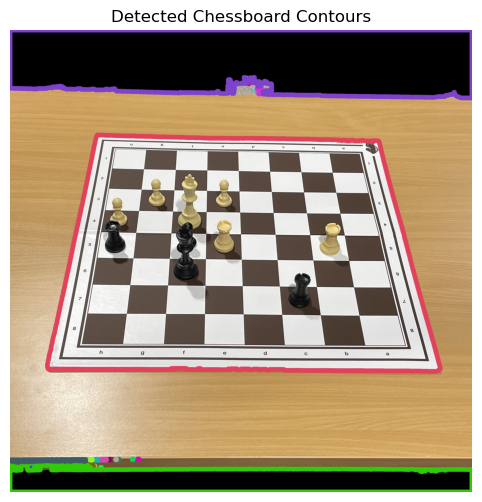

In [148]:
hsv = cv2.cvtColor(masked_image, cv2.COLOR_BGR2HSV)

table_color_mask = cv2.inRange(hsv, lower_brown, upper_brown)
chessboard_mask = cv2.bitwise_not(table_color_mask)

kernel = np.ones((3, 3), np.uint8)
chessboard_mask = cv2.morphologyEx(chessboard_mask, cv2.MORPH_CLOSE, kernel)
chessboard_mask = cv2.morphologyEx(chessboard_mask, cv2.MORPH_OPEN, kernel, iterations=2)

contours_, _ = cv2.findContours(chessboard_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
height, width = chessboard_mask.shape[:2]


# draw contours on the original image
contour_image = masked_image.copy()
for contour in contours_:
    random_color = tuple(np.random.randint(0, 255, 3).tolist())

    cv2.drawContours(contour_image, [contour], -1, random_color, 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contours")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()




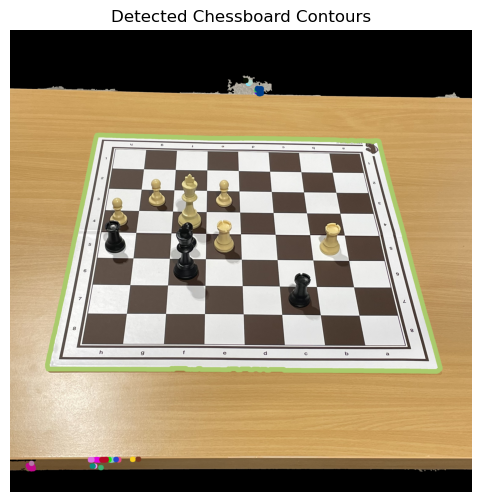

In [149]:

def is_touching_border(contour, width, height):
    for point in contour:
        x, y = point[0]
        if x <= 1 or y <= 1 or x >= width - 2 or y >= height - 2:
            return True
    return False

contours = [cnt for cnt in contours_ if not is_touching_border(cnt, width, height)]


# draw contours on the original image
contour_image = masked_image.copy()
for contour in contours:
    random_color = tuple(np.random.randint(0, 255, 3).tolist())

    cv2.drawContours(contour_image, [contour], -1, random_color, 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contours")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()


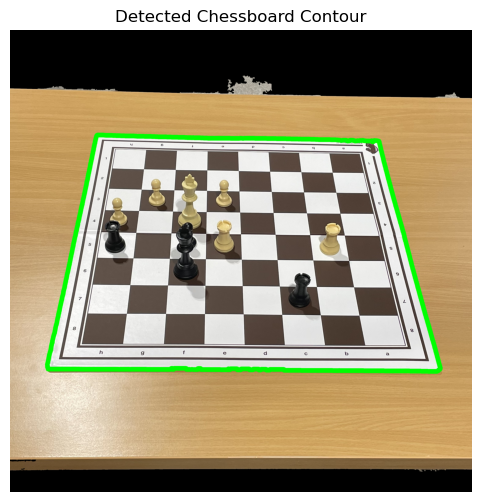

In [150]:
chessboard_countor = max(contours, key=cv2.contourArea)

# draw contours on the original image
contour_image = masked_image.copy()
cv2.drawContours(contour_image, [chessboard_countor], -1, (0, 255, 0), 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contour")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()

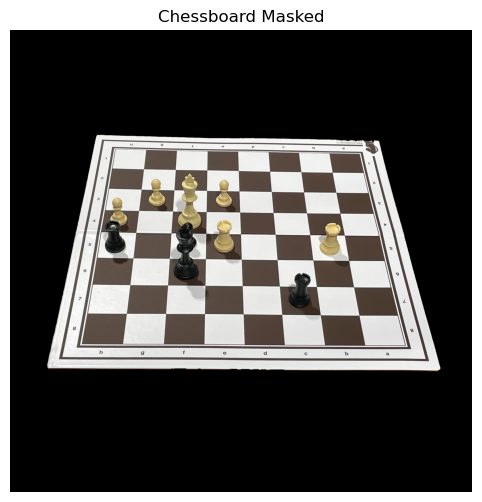

In [151]:
## aply mask to the image
chessboard_mask = np.zeros_like(image)
cv2.drawContours(chessboard_mask, [chessboard_countor], -1, (255, 255, 255), thickness=cv2.FILLED)
masked_image = cv2.bitwise_and(image, chessboard_mask)
masked_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Chessboard Masked")
plt.imshow(masked_rgb)
plt.axis('off')
plt.show()

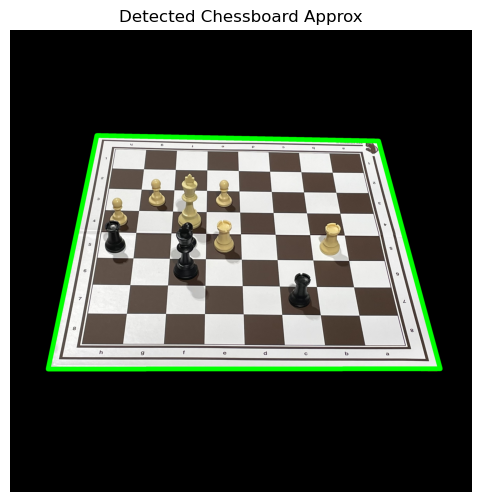

In [152]:
approx = cv2.approxPolyDP(chessboard_countor, 0.06 * cv2.arcLength(chessboard_countor, True), True)

# draw contours on the original image
contour_image = masked_image.copy()
cv2.drawContours(contour_image, [approx], -1, (0, 255, 0), 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Approx")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()

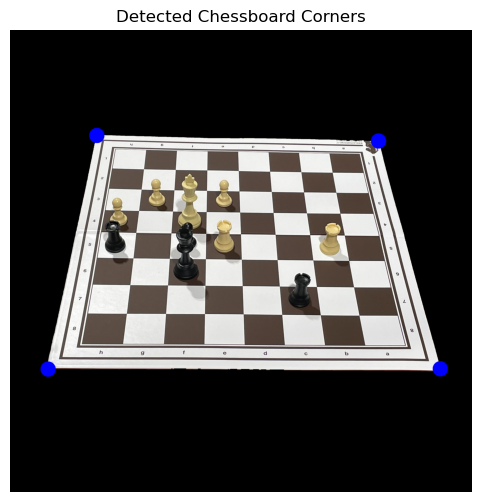

In [153]:
corners = approx.reshape(4, 2)
corners = corners[np.argsort(corners[:, 0])]


left_corners = corners[:2]

top_left = left_corners[np.argmin(left_corners[:, 1])]
bottom_left = left_corners[np.argmax(left_corners[:, 1])]

right_corners = corners[2:]
top_right = right_corners[np.argmin(right_corners[:, 1])]
bottom_right = right_corners[np.argmax(right_corners[:, 1])]


ordered_corners = [top_left, top_right, bottom_right, bottom_left]

# draw contours on the original image
corner_image = masked_image.copy()
for corner in ordered_corners:
    cv2.circle(corner_image, tuple(corner), 50, (255,0,0), -1)

corner_rgb = cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Corners")
plt.imshow(corner_rgb)
plt.axis('off')
plt.show()

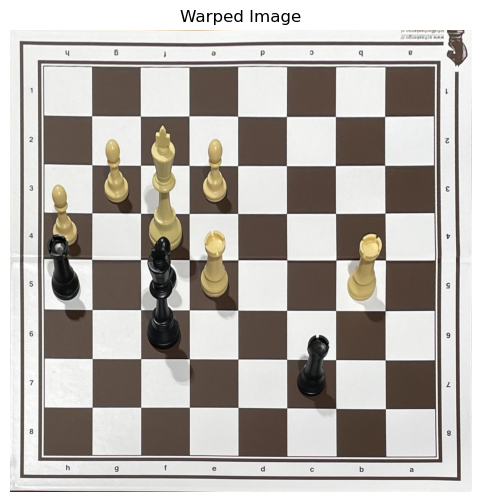

In [154]:
output_size = 3024

dst = np.array([
        [0, 0],
        [output_size - 1, 0],
        [output_size - 1, output_size - 1],
        [0, output_size - 1]
    ], dtype="float32")

M = cv2.getPerspectiveTransform(np.array(ordered_corners, dtype="float32"), dst)
warped = cv2.warpPerspective(image, M, (output_size, output_size))
warped_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Warped Image")   
plt.imshow(warped_rgb)
plt.axis('off')
plt.show()

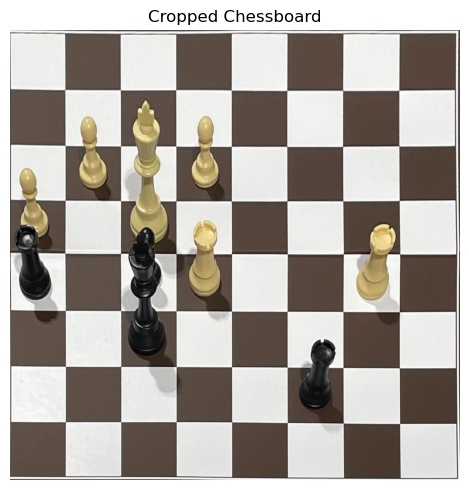

In [155]:
def crop_with_padding(image, padding=0):
    h, w = image.shape[:2]
    top = bottom = left = right = padding

    if padding > 0:
        top = bottom = left = right = padding

    cropped_image = image[top:h-bottom, left:w-right]
    return cropped_image

cropped_chessboard = crop_with_padding(warped, padding=220)

plt.figure(figsize=(10, 5))
plt.title("Cropped Chessboard")
plt.imshow(cv2.cvtColor(cropped_chessboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

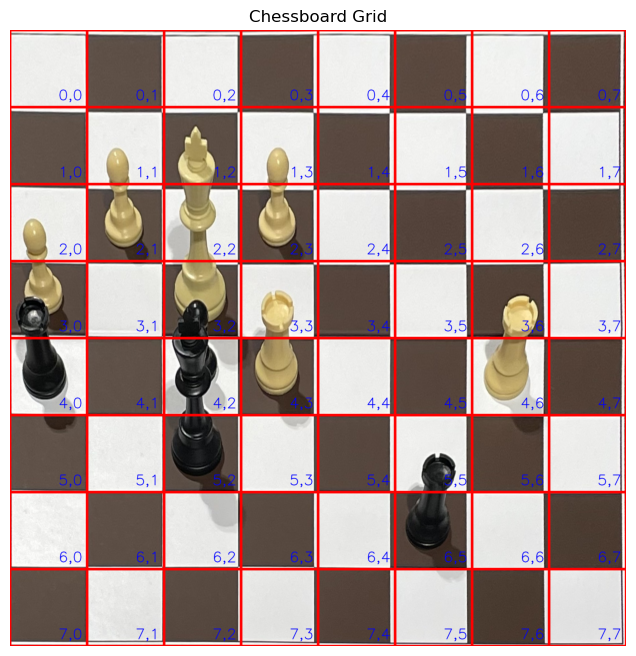

In [156]:
def draw_chess_grid(image, rows=8, cols=8):
    image_copy = image.copy()
    h, w = image.shape[:2]
    cell_height = h // rows
    cell_width = w // cols

    cell_coords = []

    for i in range(rows):
        for j in range(cols):
            x1, y1 = j * cell_width, i * cell_height
            x2, y2 = (j + 1) * cell_width, (i + 1) * cell_height

            cell_coords.append({
                "row": i,
                "col": j,
                "bbox": (x1, y1, x2, y2)
            })

            cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 0, 255), 10) 
            cv2.putText(image_copy, f"{i},{j}", (x2 - 120, y2 - 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA) 

    return image_copy, cell_coords



annotated_image, grid_info = draw_chess_grid(cropped_chessboard)

plt.figure(figsize=(8, 8))
plt.title("Chessboard Grid")
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [157]:
def detect_pieces_by_center_multi(image, grid_info, patch_size=12, threshold_diff=35, offset_y=10):
    piece_positions = []
    image_copy = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    directions = [(0, 0), (-offset_y, 0), (offset_y, 0), (0, -offset_y), (0, offset_y)]

    for cell in grid_info:
        x1, y1, x2, y2 = cell["bbox"]
        cx = (x1 + x2) // 2
        cy = (y1 + y2) // 2
        bg_intensity = np.mean(gray[y1:y2, x1:x2])

        for dy, dx in directions:
            px, py = cx + dx, cy + dy
            ps = patch_size // 2

            if py - ps < 0 or py + ps > h or px - ps < 0 or px + ps > w:
                continue

            patch = gray[py - ps:py + ps, px - ps:px + ps]
            diff = abs(np.mean(patch) - bg_intensity)

            if diff > threshold_diff:
                piece_positions.append({
                    "row": cell["row"],
                    "col": cell["col"],
                    "intensity_diff": diff
                })

                for dy2, dx2 in directions:
                    cv2.circle(image_copy, (cx + dx2, cy + dy2), 3, (0, 0, 255), 10)

                cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(image_copy, "P", (x1 + 5, y1 + 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)
                break

    return image_copy, piece_positions



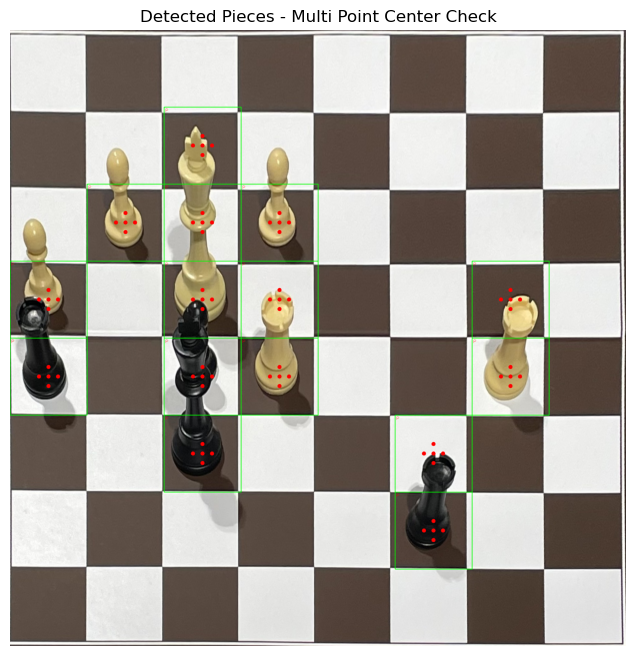

Piece found at row 1, col 2 with intensity difference 52.01133886284947
Piece found at row 2, col 1 with intensity difference 38.78225932706471
Piece found at row 2, col 2 with intensity difference 53.29475891437451
Piece found at row 2, col 3 with intensity difference 40.20887748532685
Piece found at row 3, col 0 with intensity difference 82.91611133210004
Piece found at row 3, col 2 with intensity difference 68.97862251467315
Piece found at row 3, col 3 with intensity difference 41.43475374642824
Piece found at row 3, col 6 with intensity difference 43.627007804371004
Piece found at row 4, col 0 with intensity difference 138.67166048430124
Piece found at row 4, col 2 with intensity difference 119.06712991806901
Piece found at row 4, col 3 with intensity difference 61.723848421286945
Piece found at row 4, col 6 with intensity difference 54.793772651366794
Piece found at row 5, col 2 with intensity difference 41.257835123077534
Piece found at row 5, col 5 with intensity difference 47.8

In [158]:

img_with_pieces, pieces = detect_pieces_by_center_multi(cropped_chessboard, grid_info, offset_y= 40)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_with_pieces, cv2.COLOR_BGR2RGB))
plt.title("Detected Pieces - Multi Point Center Check")
plt.axis("off")
plt.show()

for piece in pieces:
    print(f"Piece found at row {piece['row']}, col {piece['col']} with intensity difference {piece['intensity_diff']}")

In [159]:
def detect_pieces_by_center_multi(image, grid_info, patch_size=12, threshold_diff=35, offset_y=10):
    piece_positions = []
    image_copy = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    directions = [(0, 0), (-offset_y, 0), (offset_y, 0), (0, -offset_y), (0, offset_y)]

    for cell in grid_info:
        x1, y1, x2, y2 = cell["bbox"]
        
        # Recortar toda a área da célula
        cell_patch = gray[y1:y2, x1:x2]
        
        # Aplicar Canny para detectar bordas na célula inteira
        blurred = cv2.GaussianBlur(cell_patch, (3, 3), 0)  # Desfoque para reduzir ruído
        edges = cv2.Canny(blurred, 50, 150)  # Detectar bordas com Canny
        
        # Exibir o resultado do Canny (opcional para depuração)
      

        # Encontrar contornos nas bordas detectadas
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        has_piece = False
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 30:  # Ignorar contornos muito pequenos
                has_piece = True
                break  # Encontrou contorno significativo, podemos sair

        if has_piece:
            piece_positions.append({
                "row": cell["row"],
                "col": cell["col"],
                "intensity_diff": None  # Não estamos usando a diferença de intensidade aqui, pois estamos com contornos
            })

            # Desenhar a célula onde a peça foi detectada
            cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Caixa verde
            cv2.putText(image_copy, "P", (x1 + 5, y1 + 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)

            # Opcional: desenhar um círculo no centro da célula
            cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
            cv2.circle(image_copy, (cx, cy), 3, (0, 0, 255), 10)

    return image_copy, piece_positions

In [160]:
def detect_single_piece_per_cell(image, grid_info, central_ratio=0.5):
    piece_positions = []
    image_copy = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    faixa_preto = ((0, 0, 0), (180, 255, 50))           # preto profundo
    faixa_creme = ((15, 30, 130), (40, 150, 255))       # creme/bege claro

    for cell in grid_info:
        x1, y1, x2, y2 = cell["bbox"]
        row, col = cell["row"], cell["col"]

        # Calcular região central
        w = x2 - x1
        h = y2 - y1
        margin_x = int((1 - central_ratio) / 2 * w)
        margin_y = int((1 - central_ratio) / 2 * h)
        x1_c = x1 + margin_x
        y1_c = y1 + margin_y
        x2_c = x2 - margin_x
        y2_c = y2 - margin_y

        cell_hsv_patch = hsv[y1_c:y2_c, x1_c:x2_c]
        total_pixels = cell_hsv_patch.shape[0] * cell_hsv_patch.shape[1]

        # Máscaras de cor
        mask_preto = cv2.inRange(cell_hsv_patch, *faixa_preto)
        mask_creme = cv2.inRange(cell_hsv_patch, *faixa_creme)

        qtd_preto = cv2.countNonZero(mask_preto)
        qtd_creme = cv2.countNonZero(mask_creme)
        qtd_ocupado = qtd_preto + qtd_creme

        proporcao_ocupada = qtd_ocupado / total_pixels
        proporcao_livre = 1 - proporcao_ocupada

        if proporcao_livre >= 0.74:
            continue  # Se está 70% livre, consideramos vazia

        # Se não for suficientemente livre, aplicar lógica de contornos
        cell_patch = gray[y1:y2, x1:x2]
        blurred = cv2.GaussianBlur(cell_patch, (3, 3), 0)
        edges = cv2.Canny(blurred, 50, 150)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        has_piece = False
        mid_area_detected = False
        top_1 = False

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 1 and area < w * h:
                cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
                point_from_bot = False
                point_from_mid = False

                for point in cnt:
                    px, py = point[0]
                    px_global = px + x1
                    py_global = py + y1
                    if py <= 170:
                        point_from_mid = True
                    if py >= h - 40:
                        point_from_bot = True
                    if point_from_bot and point_from_mid:
                        continue
                    if 40 < py < 60 and 40 < px < 280:
                        top_1 = True
                    if (cx - 80 <= px_global <= cx + 80) and (cy - 80 <= py_global <= cy + 80):
                        mid_area_detected = True
                        break

                if mid_area_detected and top_1:
                    has_piece = True
                    break

        if has_piece:
            piece_positions.append({"row": row, "col": col})
            cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 50)
            cv2.putText(image_copy, "P", (x1 + 5, y1 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)
            cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
            cv2.circle(image_copy, (cx, cy), 3, (0, 0, 255), 40)

    return image_copy, piece_positions


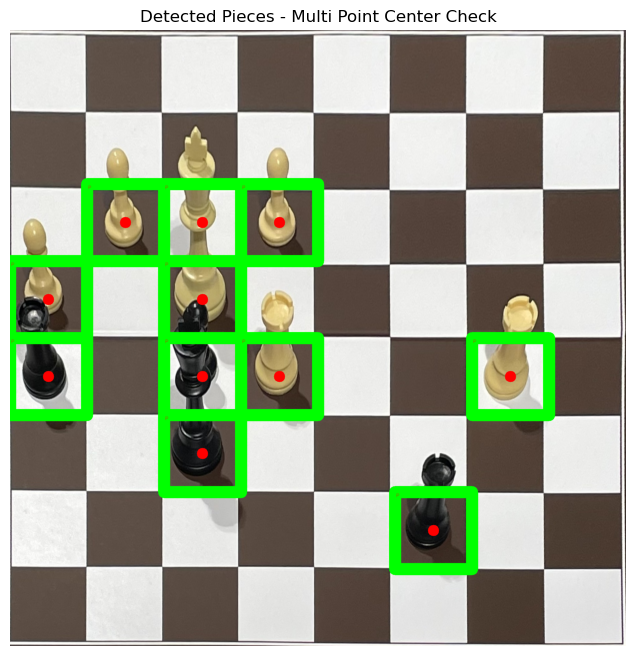

Piece found at row 2, col 1
Piece found at row 2, col 2
Piece found at row 2, col 3
Piece found at row 3, col 0
Piece found at row 3, col 2
Piece found at row 4, col 0
Piece found at row 4, col 2
Piece found at row 4, col 3
Piece found at row 4, col 6
Piece found at row 5, col 2
Piece found at row 6, col 5


In [161]:

img_with_pieces, pieces = detect_single_piece_per_cell(cropped_chessboard, grid_info)

matrix = np.zeros((8, 8), dtype=int)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_with_pieces, cv2.COLOR_BGR2RGB))
plt.title("Detected Pieces - Multi Point Center Check")
plt.axis("off")
plt.show()

for piece in pieces:
    matrix[piece["row"], piece["col"]] = 1
    print(f"Piece found at row {piece['row']}, col {piece['col']}")

In [170]:
def detectar_ocupacao_por_cor(image, grid_info, central_ratio=1):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    resultados = []

    # Faixas de cor para peças:
    faixa_preto = ((0, 0, 0), (180, 255, 50))           # preto profundo
    faixa_creme = ((15, 30, 130), (40, 150, 255))       # creme/bege claro

    for cell in grid_info:
        x1, y1, x2, y2 = cell["bbox"]
        row, col = cell["row"], cell["col"]

        w = x2 - x1
        h = y2 - y1

        margin_x = int((1 - central_ratio) / 2 * w)
        margin_y = int((1 - central_ratio) / 2 * h)

        x1_c = x1 + margin_x
        y1_c = y1 + margin_y
        x2_c = x2 - margin_x
        y2_c = y2 - margin_y

        cell_patch = hsv[y1_c:y2_c, x1_c:x2_c]

        mask_preto = cv2.inRange(cell_patch, *faixa_preto)
        mask_creme = cv2.inRange(cell_patch, *faixa_creme)

        total_pixels = cell_patch.shape[0] * cell_patch.shape[1]
        qtd_preto = cv2.countNonZero(mask_preto)
        qtd_creme = cv2.countNonZero(mask_creme)

        qtd_total = qtd_preto + qtd_creme
        proporcao_ocupada = qtd_total / total_pixels
        proporcao_livre = 1 - proporcao_ocupada
            

        print(f"[Célula {row}, {col}]")
        print(f"  Pixels pretos: {qtd_preto}, Pixels creme: {qtd_creme}")
        print(f"  Ocupação estimada: {proporcao_ocupada:.2%}")
        print(f"  Livre: {proporcao_livre:.2%}\n")

        resultados.append({
            "row": row,
            "col": col,
            "preto": qtd_preto,
            "creme": qtd_creme,
            "proporcao_ocupada": proporcao_ocupada
        })

    return resultados


In [171]:
detectar_ocupacao_por_cor(cropped_chessboard, grid_info)

[Célula 0, 0]
  Pixels pretos: 24, Pixels creme: 0
  Ocupação estimada: 0.02%
  Livre: 99.98%

[Célula 0, 1]
  Pixels pretos: 0, Pixels creme: 44
  Ocupação estimada: 0.04%
  Livre: 99.96%

[Célula 0, 2]
  Pixels pretos: 19, Pixels creme: 0
  Ocupação estimada: 0.02%
  Livre: 99.98%

[Célula 0, 3]
  Pixels pretos: 0, Pixels creme: 0
  Ocupação estimada: 0.00%
  Livre: 100.00%

[Célula 0, 4]
  Pixels pretos: 30, Pixels creme: 0
  Ocupação estimada: 0.03%
  Livre: 99.97%

[Célula 0, 5]
  Pixels pretos: 0, Pixels creme: 0
  Ocupação estimada: 0.00%
  Livre: 100.00%

[Célula 0, 6]
  Pixels pretos: 112, Pixels creme: 0
  Ocupação estimada: 0.11%
  Livre: 99.89%

[Célula 0, 7]
  Pixels pretos: 263, Pixels creme: 4
  Ocupação estimada: 0.26%
  Livre: 99.74%

[Célula 1, 0]
  Pixels pretos: 1, Pixels creme: 0
  Ocupação estimada: 0.00%
  Livre: 100.00%

[Célula 1, 1]
  Pixels pretos: 31, Pixels creme: 12215
  Ocupação estimada: 11.74%
  Livre: 88.26%

[Célula 1, 2]
  Pixels pretos: 22, Pixels c

[{'row': 0,
  'col': 0,
  'preto': 24,
  'creme': 0,
  'proporcao_ocupada': 0.0002300415033212242},
 {'row': 0,
  'col': 1,
  'preto': 0,
  'creme': 44,
  'proporcao_ocupada': 0.00042174275608891106},
 {'row': 0,
  'col': 2,
  'preto': 19,
  'creme': 0,
  'proporcao_ocupada': 0.00018211619012930248},
 {'row': 0, 'col': 3, 'preto': 0, 'creme': 0, 'proporcao_ocupada': 0.0},
 {'row': 0,
  'col': 4,
  'preto': 30,
  'creme': 0,
  'proporcao_ocupada': 0.00028755187915153026},
 {'row': 0, 'col': 5, 'preto': 0, 'creme': 0, 'proporcao_ocupada': 0.0},
 {'row': 0,
  'col': 6,
  'preto': 112,
  'creme': 0,
  'proporcao_ocupada': 0.0010735270154990464},
 {'row': 0,
  'col': 7,
  'preto': 263,
  'creme': 4,
  'proporcao_ocupada': 0.002559211724448619},
 {'row': 1,
  'col': 0,
  'preto': 1,
  'creme': 0,
  'proporcao_ocupada': 9.585062638384341e-06},
 {'row': 1,
  'col': 1,
  'preto': 31,
  'creme': 12215,
  'proporcao_ocupada': 0.11737867706965464},
 {'row': 1,
  'col': 2,
  'preto': 22,
  'creme':

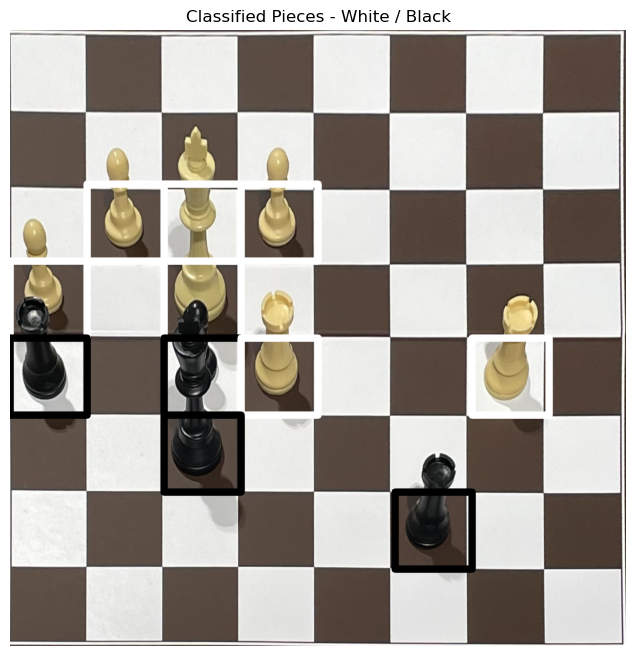

Piece at (2, 1) is white
Piece at (2, 2) is white
Piece at (2, 3) is white
Piece at (3, 0) is white
Piece at (3, 2) is white
Piece at (4, 0) is black
Piece at (4, 2) is black
Piece at (4, 3) is white
Piece at (4, 6) is white
Piece at (5, 2) is black
Piece at (6, 5) is black


In [164]:
def classify_piece_color(image, grid_info, piece_positions, patch_size=12, threshold_brightness=130):
    colors = {}
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, w = hsv.shape[:2]
    image_copy = image.copy()

    for piece in piece_positions:
        r, c = piece["row"], piece["col"]

        cell = next(cell for cell in grid_info if cell["row"] == r and cell["col"] == c)
        x1, y1, x2, y2 = cell["bbox"]
        cx = (x1 + x2) // 2
        cy = (y1 + y2) // 2

        ps = patch_size // 2
        if cy-ps < 0 or cy+ps > h or cx-ps < 0 or cx+ps > w:
            continue

        patch = hsv[cy-ps:cy+ps, cx-ps:cx+ps]
        mean_v = np.mean(patch[:, :, 2])

        color = "white" if mean_v > threshold_brightness else "black"
        colors[(r, c)] = color

        box_color = (255, 255, 255) if color == "white" else (0, 0, 0)

        cv2.rectangle(image_copy, (x1, y1), (x2, y2), box_color, 30)

    return image_copy, colors


colored_img, piece_colors = classify_piece_color(cropped_chessboard, grid_info, pieces)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(colored_img, cv2.COLOR_BGR2RGB))
plt.title("Classified Pieces - White / Black")
plt.axis("off")
plt.show()

for (row, col), color in piece_colors.items():
    print(f"Piece at ({row}, {col}) is {color}")




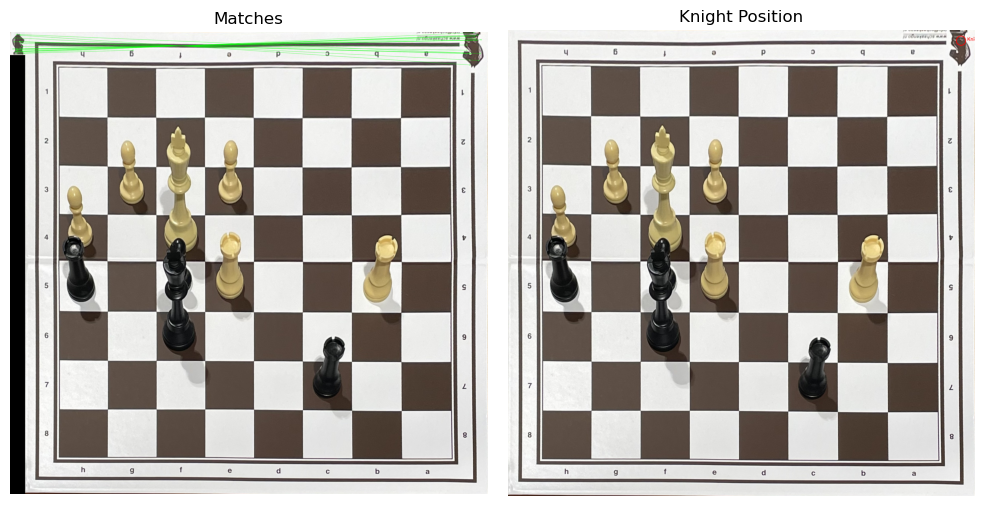

Knight found at position: (2933, 75)


In [165]:
# Load images
knight_gray = cv2.imread("knight2.png", cv2.IMREAD_GRAYSCALE)
knight_color = cv2.imread("knight2.png")
chessboard_gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
chessboard_color = warped.copy()

# SIFT detector
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(knight_gray, None)
kp2, des2 = sift.detectAndCompute(chessboard_gray, None)

# FLANN matcher
index_params = dict(algorithm=1, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Ratio test (Lowe's criterion)
good_matches = [m for m, n in matches if m.distance < 0.7 * n.distance]

# Draw matches
match_output = cv2.drawMatches(
    knight_color, kp1, chessboard_color, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0)
)

# Estimate knight position
if good_matches:
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)
    knight_pos = np.median(dst_pts, axis=0).astype(int)

    cv2.circle(chessboard_color, tuple(knight_pos), 30, (0, 0, 255), 3)
    cv2.putText(chessboard_color, "Knight", (knight_pos[0] + 40, knight_pos[1]),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Matches")
plt.imshow(cv2.cvtColor(match_output, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Knight Position")
plt.imshow(cv2.cvtColor(chessboard_color, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()

# Output position
if good_matches:
    print(f"Knight found at position: {tuple(knight_pos)}")
else:
    print("Knight not found – try adjusting the ratio threshold.")


Knight position: (2933, 75) | Center: (1512, 1512)
Rotating 180º to place the knight in the bottom-left corner


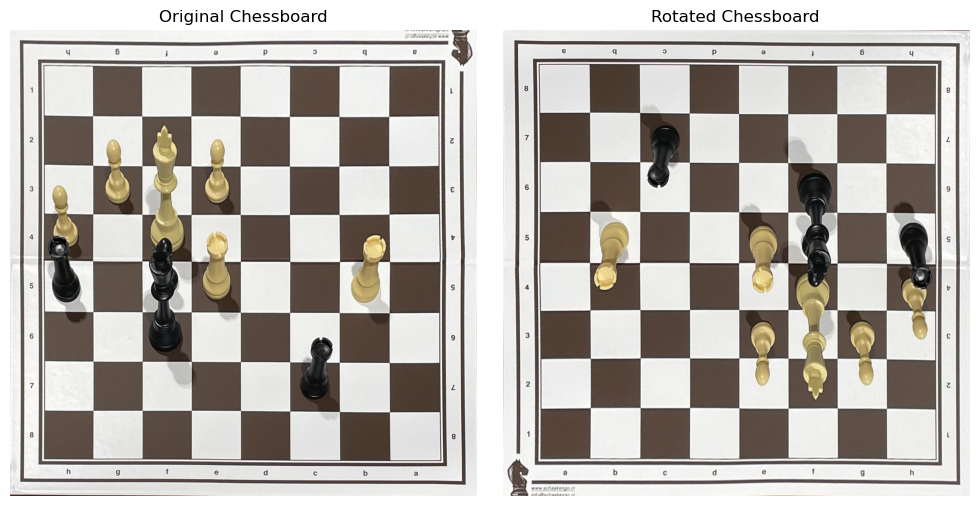

In [166]:
def rotate_knight_to_bottom_left(image, knight_pos):
    h, w = image.shape[:2]
    cx, cy = w // 2, h // 2
    
    x, y = knight_pos 

    print(f"Knight position: ({x}, {y}) | Center: ({cx}, {cy})")

    if x < cx and y < cy:
        angle = 90  
    elif x >= cx and y < cy:
        angle = 180 
    elif x >= cx and y >= cy:
        angle = 270 
    else:
        angle = 0  

    print(f"Rotating {angle}º to place the knight in the bottom-left corner")

    if angle == 90:
        rotated = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    elif angle == 180:
        rotated = cv2.rotate(image, cv2.ROTATE_180) 
    elif angle == 270:
        rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE) 
    else:
        rotated = image.copy() 

    return rotated, angle


rotated_chessboard, rotation_angle = rotate_knight_to_bottom_left(warped, knight_pos)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Chessboard")
plt.imshow(warped_rgb)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Rotated Chessboard")
plt.imshow(cv2.cvtColor(rotated_chessboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

Matrix before rotation:

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [1 0 1 1 0 0 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]]


Rotating the matrix 180º
Matrix after rotation:

[[0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 1 0 0 1 1 0 1]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


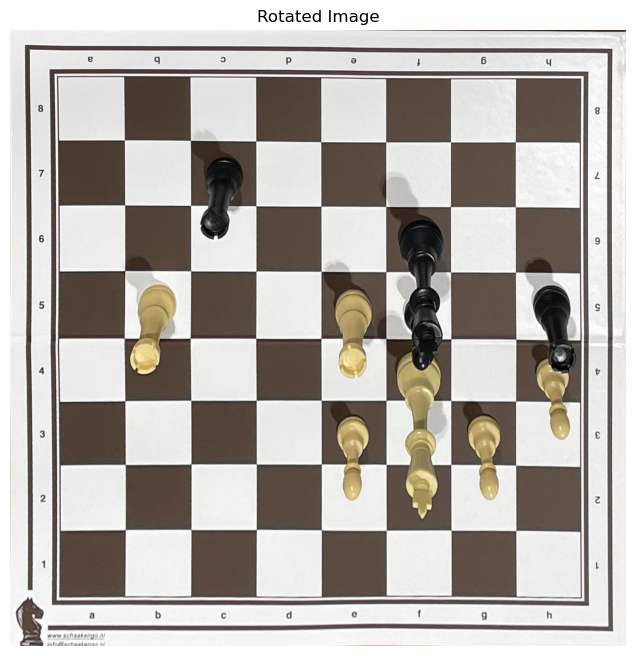

In [167]:
# Since we now dont rotate the image according to the knight position because its easier to detect the pieces in the chessboard, so we need to rotate the matrix according to the rotation angle

print("Matrix before rotation:\n")
print(matrix)
print("\n")

if rotation_angle == 90:
    print(f"Rotating the matrix {rotation_angle}º Counterclockwise")
    matrix = np.rot90(matrix, k=1)
elif rotation_angle == 180:
    print(f"Rotating the matrix {rotation_angle}º")
    matrix = np.rot90(matrix, k=2)
elif rotation_angle == 270:
    print(f"Rotating the matrix {rotation_angle}º Counterclockwise")
    matrix = np.rot90(matrix, k=3)
else:
    print(f"No rotation needed for the matrix.\n")

print("Matrix after rotation:\n")
print(matrix)


plt.figure(figsize=(8, 8))
plt.title("Rotated Image")
plt.imshow(cv2.cvtColor(rotated_chessboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()